In [ ]:
!pip install datasets
!pip install transformers datasets
!pip install torch;
!pip install accelerate --upgrade;

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 require

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
llm_dtst = pd.read_csv("hf://datasets/grammarly/detexd-benchmark/test.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
llm_dtst.head()

,text,annotator_1,annotator_2,annotator_3,label
0,"""), as well as other minority interests and gr...",0,0,0,0
1,"""As the dynamic audio industry continues to ev...",2,1,0,0
2,"""Blender doesn’t care how many vertex groups y...",0,0,0,0
3,"""He asked me and the club if we could give him...",0,0,0,0
4,"""I think a lot of things I heard from the boar...",0,0,0,0


In [ ]:
llm_dtst.drop(['annotator_1','annotator_2','annotator_3'], axis=1, inplace=True)

In [ ]:
llm_dtst.shape

(1023, 2)

In [ ]:
llm_dtst.head()

,text,label
0,"""), as well as other minority interests and gr...",0
1,"""As the dynamic audio industry continues to ev...",0
2,"""Blender doesn’t care how many vertex groups y...",0
3,"""He asked me and the club if we could give him...",0
4,"""I think a lot of things I heard from the boar...",0


In [ ]:
llm_dtst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1023 non-null   object
 1   label   1023 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.1+ KB


In [ ]:
llm_dtst.duplicated().sum()

0

In [ ]:
llm_dtst['label'].unique()

array([0, 1])

## Preprocessing the Dataset

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Removing the Punctuations from the Dataset

In [ ]:
# Sample text data
text = llm_dtst

# Removing punctuations
text['clean_punctuation'] = text['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
text.head()

,text,label,clean_punctuation
0,"""), as well as other minority interests and gr...",0,as well as other minority interests and green...
1,"""As the dynamic audio industry continues to ev...",0,As the dynamic audio industry continues to evo...
2,"""Blender doesn’t care how many vertex groups y...",0,Blender doesnt care how many vertex groups you...
3,"""He asked me and the club if we could give him...",0,He asked me and the club if we could give him ...
4,"""I think a lot of things I heard from the boar...",0,I think a lot of things I heard from the board...


### Converting the dataset into Lower case

In [ ]:
# Lower casing
text['Lower case'] = text['clean_punctuation'].apply(lambda x: x.lower())

In [ ]:
text.head()

,text,label,clean_punctuation,Lower case
0,"""), as well as other minority interests and gr...",0,as well as other minority interests and green...,as well as other minority interests and green...
1,"""As the dynamic audio industry continues to ev...",0,As the dynamic audio industry continues to evo...,as the dynamic audio industry continues to evo...
2,"""Blender doesn’t care how many vertex groups y...",0,Blender doesnt care how many vertex groups you...,blender doesnt care how many vertex groups you...
3,"""He asked me and the club if we could give him...",0,He asked me and the club if we could give him ...,he asked me and the club if we could give him ...
4,"""I think a lot of things I heard from the boar...",0,I think a lot of things I heard from the board...,i think a lot of things i heard from the board...


## Distribution of Labels

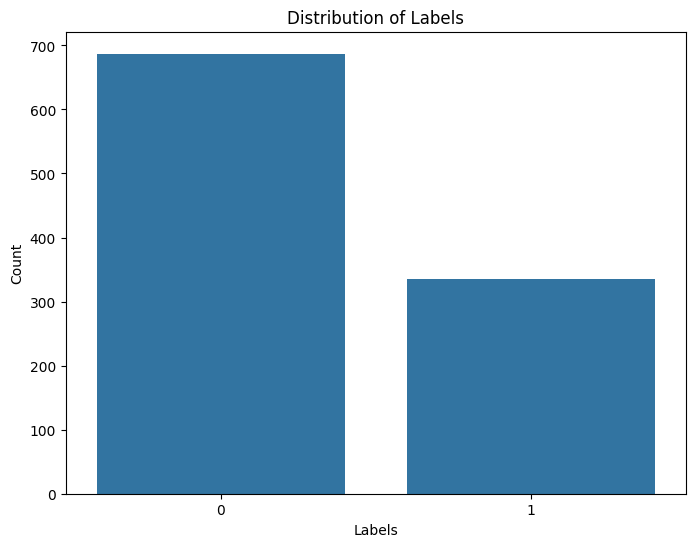

In [ ]:
def plot_label_distribution(dataframe, column_name='label'):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column_name, data=dataframe)
    plt.title('Distribution of Labels')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.show()

plot_label_distribution(text)

## Word Cloud

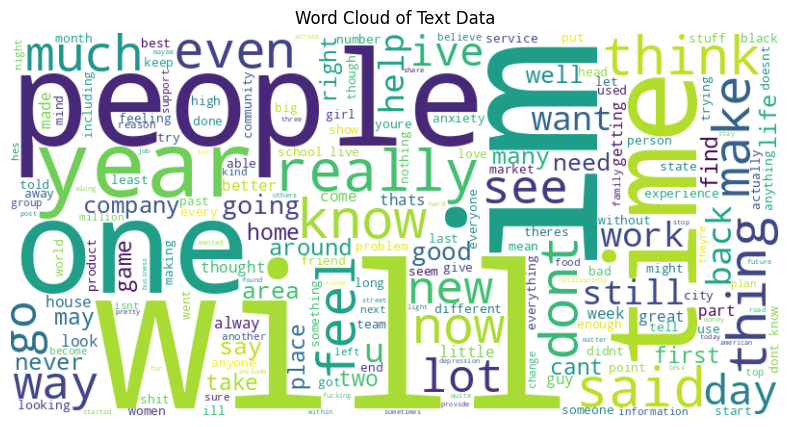

In [ ]:
def plot_word_cloud(text_data):
    all_text = " ".join(text_data['Lower case'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Text Data')
    plt.show()


plot_word_cloud(text)

## Word Frequency Plot

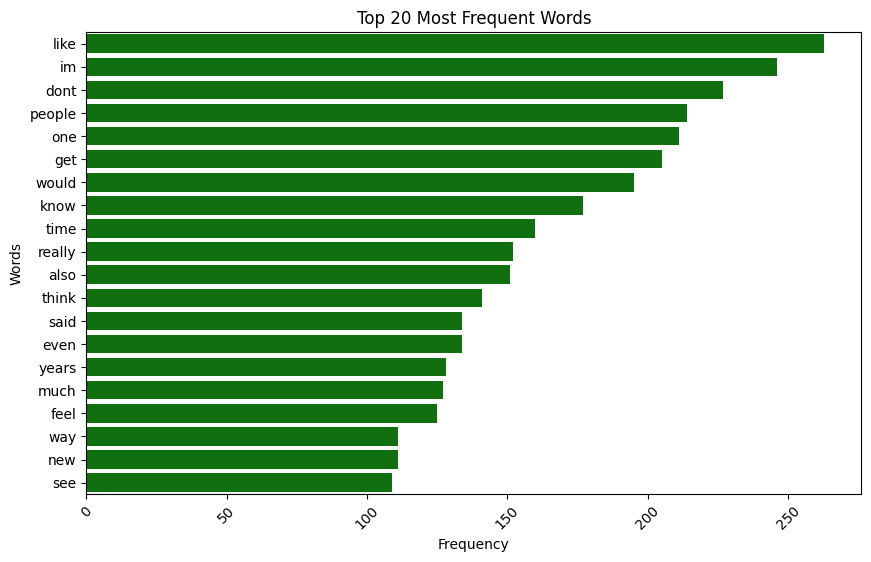

In [ ]:
def plot_top_20_words(text_series):
    # Concatenate all text in the series into a single string
    combined_text = ' '.join(text_series.astype(str).tolist())

    tokens = word_tokenize(combined_text.lower())  # Ensure the text is converted to lowercase
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    word_freq = Counter(filtered_tokens).most_common(20)
    word_freq_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=word_freq_df, color='green')  # Use color instead of palette
    plt.title('Top 20 Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
    plt.show()

# Example usage
plot_top_20_words(text['Lower case'])

## Average Word Length

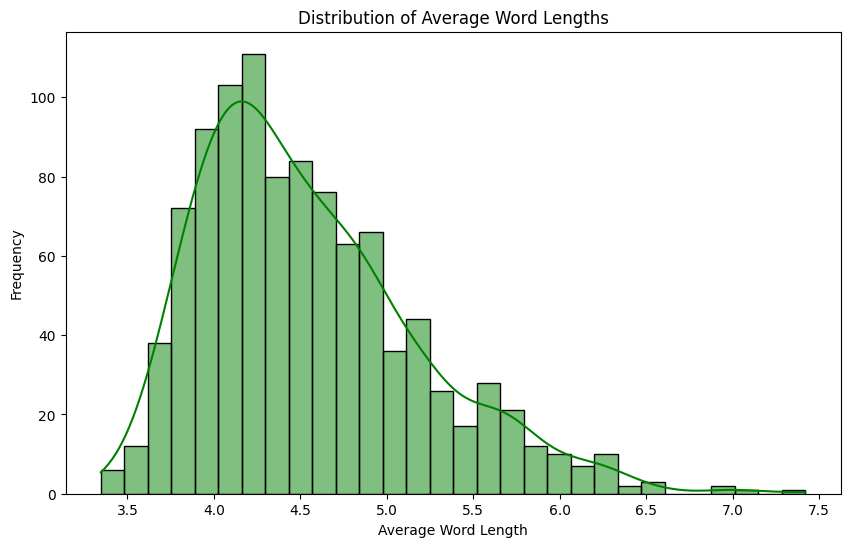

In [ ]:
def plot_avg_word_lengths(dataframe, column_name='Lower case'):
    def avg_word_length(text):
        words = text.split()
        return sum(len(word) for word in words) / len(words) if words else 0

    dataframe['avg_word_length'] = dataframe[column_name].apply(avg_word_length)
    plt.figure(figsize=(10, 6))
    sns.histplot(dataframe['avg_word_length'], bins=30, kde=True, color='green')
    plt.title('Distribution of Average Word Lengths')
    plt.xlabel('Average Word Length')
    plt.ylabel('Frequency')
    plt.show()

plot_avg_word_lengths(text)

## Unique Word Count

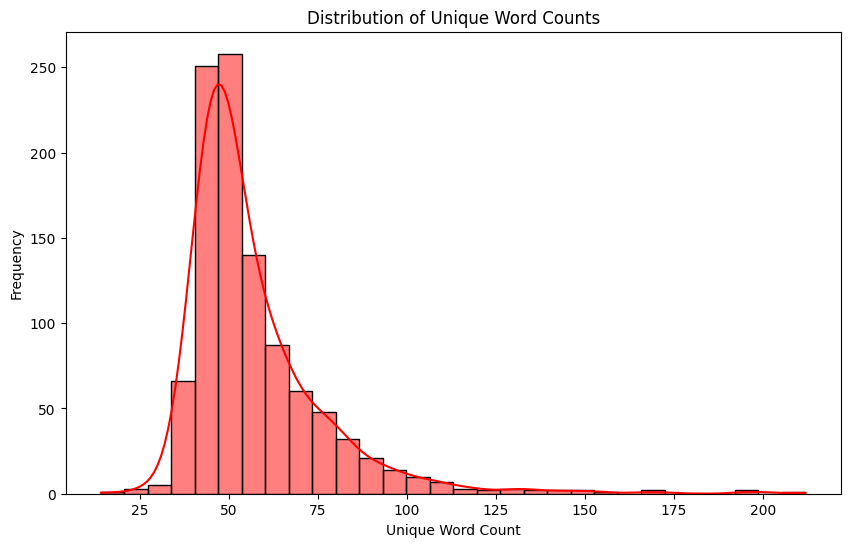

In [ ]:
def plot_unique_word_counts(dataframe, column_name='Lower case'):
    def unique_word_count(text):
        words = text.split()
        return len(set(words))

    dataframe['unique_word_count'] = dataframe[column_name].apply(unique_word_count)
    plt.figure(figsize=(10, 6))
    sns.histplot(dataframe['unique_word_count'], bins=30, kde=True, color='red')
    plt.title('Distribution of Unique Word Counts')
    plt.xlabel('Unique Word Count')
    plt.ylabel('Frequency')
    plt.show()

plot_unique_word_counts(text)

In [ ]:
processed_text = text['Lower case']

In [ ]:
processed_text.head()

0     as well as other minority interests and green...
1    as the dynamic audio industry continues to evo...
2    blender doesnt care how many vertex groups you...
3    he asked me and the club if we could give him ...
4    i think a lot of things i heard from the board...
Name: Lower case, dtype: object

## Applying Lable Encoding on Label column

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'label' column
text['encoded_label'] = label_encoder.fit_transform(text['label'])

# Display the updated DataFrame
text.head()

,text,label,clean_punctuation,Lower case,avg_word_length,unique_word_count,encoded_label
0,"""), as well as other minority interests and gr...",0,as well as other minority interests and green...,as well as other minority interests and green...,5.500000,44,0
1,"""As the dynamic audio industry continues to ev...",0,As the dynamic audio industry continues to evo...,as the dynamic audio industry continues to evo...,5.764706,75,0
2,"""Blender doesn’t care how many vertex groups y...",0,Blender doesnt care how many vertex groups you...,blender doesnt care how many vertex groups you...,4.234568,60,0
3,"""He asked me and the club if we could give him...",0,He asked me and the club if we could give him ...,he asked me and the club if we could give him ...,3.640000,41,0
4,"""I think a lot of things I heard from the boar...",0,I think a lot of things I heard from the board...,i think a lot of things i heard from the board...,4.600000,53,0


## Applying the Roberta Model

In [ ]:
import warnings
import accelerate
import transformers
import pandas as pd
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset

# Suppress specific warning
warnings.filterwarnings("ignore", message=".*weights.*not initialized.*")

# Load the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Split dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(text['Lower case'], text['encoded_label'], test_size=0.2)

# Tokenize the text data for train and validation sets
train_encodings = tokenizer(train_texts.tolist(), return_tensors='pt', padding=True, truncation=True, max_length=512)
val_encodings = tokenizer(val_texts.tolist(), return_tensors='pt', padding=True, truncation=True, max_length=512)

# Create dataset class
class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}  # Fixed tensor creation
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = TextDataset(train_encodings, torch.tensor(train_labels.values))
val_dataset = TextDataset(val_encodings, torch.tensor(val_labels.values))

# Load the model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# Define training arguments with lighter settings
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=50,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch",  # Updated from evaluation_strategy
    save_strategy="epoch",
)

# Create Trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Train the model
trainer.train();


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,0.805300,0.420450
2,0.192000,0.806289
3,0.462600,0.484865
4,0.401500,0.520114
5,0.332700,0.413133
6,0.345000,0.516429


Epoch,Training Loss,Validation Loss
1,0.805300,0.420450
2,0.192000,0.806289
3,0.462600,0.484865
4,0.401500,0.520114
5,0.332700,0.413133
6,0.345000,0.516429
7,0.387700,0.474900
8,0.332200,0.500277
9,0.142900,0.612117
10,0.476500,0.617633


## Printing the Testing set Results

Accuracy: 0.8341
Precision: 0.7636
Recall: 0.6667
F1 Score: 0.7119

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       142
           1       0.76      0.67      0.71        63

    accuracy                           0.83       205
   macro avg       0.81      0.79      0.80       205
weighted avg       0.83      0.83      0.83       205



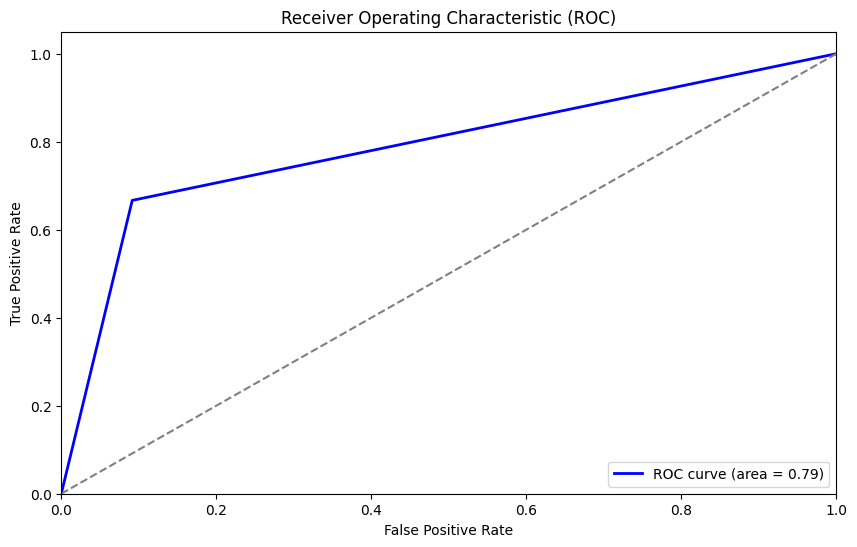

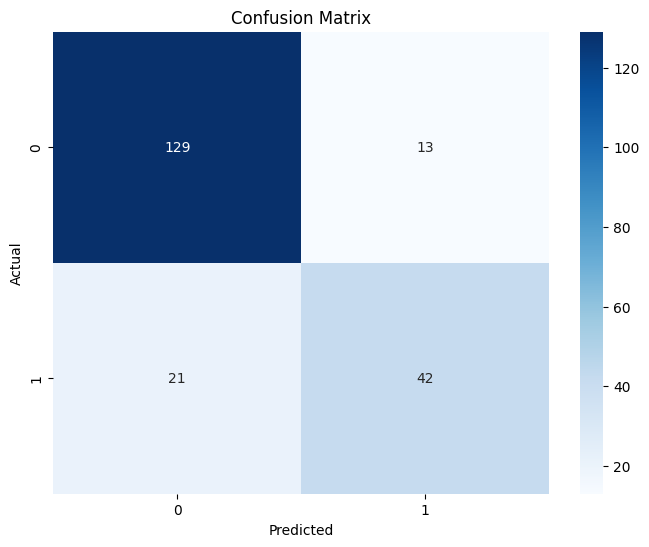

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
import seaborn as sns

# Get predictions
preds_output = trainer.predict(val_dataset)
preds = preds_output.predictions.argmax(-1)
labels = preds_output.label_ids

def evaluate_model(preds_output):
    # Extract predictions and labels
    preds = preds_output.predictions.argmax(-1)
    labels = preds_output.label_ids

    # Calculate metrics
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    conf_matrix = confusion_matrix(labels, preds)
    class_report = classification_report(labels, preds)

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print( )
    # print(f"Confusion Matrix: \n{conf_matrix}")

    print(f"Classification Report: \n{class_report}")

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(labels, preds)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()


    # Visualization: Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# Example usage
# Assuming `trainer.predict(val_dataset)` returns a preds_output object
evaluate_model(preds_output)


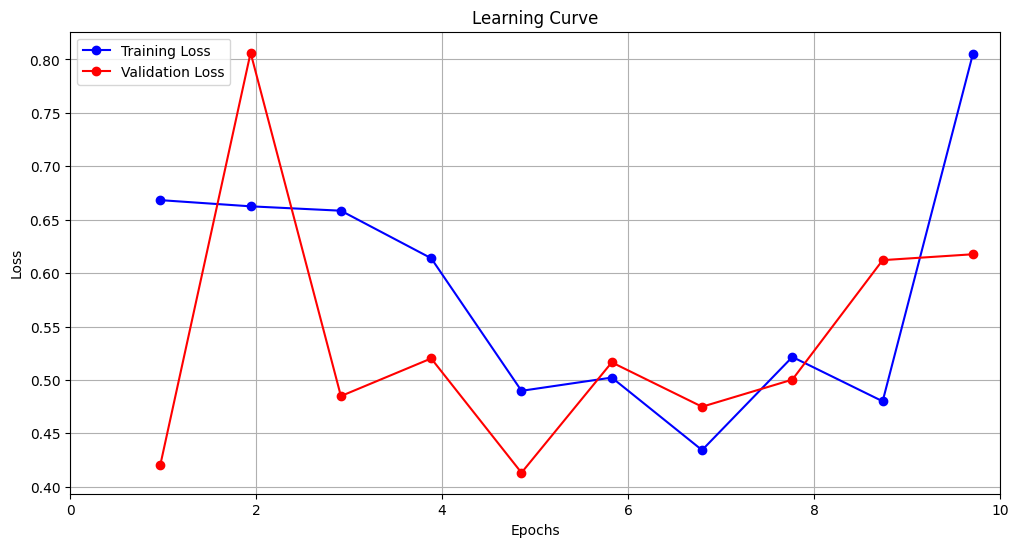

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(trainer):
    # Extract logs from the trainer
    logs = trainer.state.log_history
    epochs = []
    train_loss = []
    eval_loss = []

    # Iterate through logs and extract relevant information
    for log in logs:
        if 'epoch' in log:
            epochs.append(log['epoch'])
        if 'loss' in log:
            train_loss.append(log['loss'])
        if 'eval_loss' in log:
            eval_loss.append(log['eval_loss'])

    # Handle case where there might be mismatched lengths
    min_len = min(len(epochs), len(train_loss), len(eval_loss))

    # Trim lists to ensure they all have the same length
    epochs = epochs[:min_len]
    train_loss = train_loss[:min_len]
    eval_loss = eval_loss[:min_len]

    # Multiply epochs by 10 and convert to a list (fix for the generator issue)
    epochs = [x * 10 for x in epochs]

    # Plot learning curves
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_loss, label='Training Loss', marker='o', color='blue')
    plt.plot(epochs, eval_loss, label='Validation Loss', marker='o', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid()
    plt.xlim(0,10)
    plt.show()

# Example usage
# Assuming `trainer` is your training object
plot_learning_curves(trainer)